In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Read Data and convert to local CRS

gdf = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/pharmacies_preprocessed.geojson").to_crs('2180')

In [3]:
# Drop unique cols

#gdf1 = gdf.drop(columns=['id', 'name', 'geometry', 'Type'])
gdf1 = gdf.drop(columns=['id', 'name', 'geometry', 'Type'])
gdf1

,total,total_male,total_female,0-4_total,0-4_males,0-4_females,5-9_total,5-9_males,5-9_females,10-14_total,...,85+_males,85+_females,population_density,dentist,hospital,nursing_home,pharmacy,place_of_worship,school,university
0,47546.0,22655.0,24891.0,1841.0,944.0,899.0,2332.0,1206.0,1127.0,2454.0,...,352.0,832.0,0.606348,50.0,0.0,0.0,33.0,12.0,12.0,1.0
1,113034.0,53657.0,59379.0,5954.0,3092.0,2862.0,6435.0,3300.0,3136.0,5987.0,...,746.0,1805.0,1.441508,32.0,1.0,2.0,83.0,2.0,92.0,1.0
2,24127.0,11374.0,12752.0,916.0,450.0,466.0,1062.0,544.0,519.0,1306.0,...,112.0,325.0,0.307689,0.0,0.0,0.0,12.0,1.0,0.0,0.0
3,138987.0,65545.0,73442.0,5038.0,2568.0,2470.0,5936.0,3012.0,2924.0,6087.0,...,1228.0,2600.0,1.772483,51.0,3.0,2.0,93.0,13.0,35.0,2.0
4,65639.0,31973.0,33666.0,2687.0,1403.0,1285.0,3460.0,1777.0,1683.0,3712.0,...,403.0,860.0,0.837086,8.0,0.0,0.0,24.0,5.0,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,98669.0,46116.0,52551.0,3311.0,1699.0,1614.0,4119.0,2103.0,2017.0,4578.0,...,706.0,2009.0,1.258313,15.0,0.0,0.0,80.0,9.0,10.0,1.0
12482,3623.0,1819.0,1803.0,146.0,74.0,73.0,189.0,103.0,87.0,207.0,...,25.0,71.0,0.046204,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12483,38940.0,18575.0,20366.0,1755.0,905.0,849.0,2074.0,1050.0,1024.0,1957.0,...,277.0,684.0,0.496597,0.0,0.0,0.0,11.0,0.0,1.0,0.0
12484,13179.0,6504.0,6675.0,513.0,265.0,246.0,652.0,332.0,319.0,754.0,...,86.0,208.0,0.168070,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [4]:
# Scale data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(gdf1)

# stats of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1.248600e+04,1.248600e+04,1.248600e+04,1.248600e+04,1.248600e+04,12486.000000,1.248600e+04,1.248600e+04,12486.000000,1.248600e+04,...,1.248600e+04,1.248600e+04,1.248600e+04,1.248600e+04,1.248600e+04,1.248600e+04,12486.000000,1.248600e+04,1.248600e+04,1.248600e+04
mean,-1.821029e-17,3.642058e-17,-9.105145e-18,5.463087e-17,-5.463087e-17,0.000000,-9.105145e-18,6.373601e-17,0.000000,9.105145e-18,...,2.731543e-17,-3.642058e-17,-5.463087e-17,-3.642058e-17,-1.821029e-17,4.780201e-17,0.000000,-4.552572e-17,-4.552572e-17,4.552572e-18
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040,1.000040e+00,1.000040e+00,1.000040,1.000040e+00,...,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040,1.000040e+00,1.000040e+00,1.000040e+00
min,-8.755602e-01,-8.861598e-01,-8.662170e-01,-8.180155e-01,-8.188703e-01,-0.817605,-8.640147e-01,-8.633932e-01,-0.864580,-9.007017e-01,...,-7.887640e-01,-8.041779e-01,-8.755602e-01,-4.966923e-01,-4.169794e-01,-2.771753e-01,-0.724820,-5.596280e-01,-4.975170e-01,-2.756106e-01
25%,-7.684433e-01,-7.735170e-01,-7.639762e-01,-7.188356e-01,-7.192519e-01,-0.717823,-7.479848e-01,-7.482861e-01,-0.748163,-7.724859e-01,...,-7.159607e-01,-7.256616e-01,-7.684433e-01,-4.966923e-01,-4.169794e-01,-2.771753e-01,-0.662211,-5.596280e-01,-4.975170e-01,-2.756106e-01
50%,-4.268011e-01,-4.220160e-01,-4.289493e-01,-4.250498e-01,-4.244986e-01,-0.427103,-4.066215e-01,-4.073290e-01,-0.405826,-3.988599e-01,...,-4.334146e-01,-4.444303e-01,-4.268011e-01,-4.420982e-01,-4.169794e-01,-2.771753e-01,-0.432643,-4.362891e-01,-3.974800e-01,-2.756106e-01
75%,4.951724e-01,5.111436e-01,4.813756e-01,3.711674e-01,3.717161e-01,0.373611,4.310918e-01,4.327894e-01,0.429700,4.737423e-01,...,4.623259e-01,4.567230e-01,4.951724e-01,-3.264235e-02,-4.169794e-01,-2.771753e-01,0.256060,5.706619e-02,-6.402336e-02,-1.988153e-01
max,3.107902e+00,3.092297e+00,3.121937e+00,3.445294e+00,3.461205e+00,3.433569,3.480379e+00,3.468126e+00,3.493584,3.380310e+00,...,3.387025e+00,3.290092e+00,3.107902e+00,5.945413e+00,6.955792e+00,1.136559e+01,4.617847,5.360636e+00,5.638086e+00,8.248666e+00


In [5]:
# # define the kmeans function with intialisation as kmeans++
# kmeans = KMeans(n_clusters=2, init='k-means++')

# # fit on scaled data
# kmeans.fit(df_scaled)

# # inertia in the fitted data
# # high number means worse fit
# kmeans.inertia_

In [6]:
# # Use elbow method to determine a good number of clusters

# # fitting multiple k-means algorithms and storing the values in an empty list
# SSE = []
# for cluster in range(1,20):
#     kmeans = KMeans(n_clusters=cluster, init='k-means++')
#     kmeans.fit(df_scaled)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

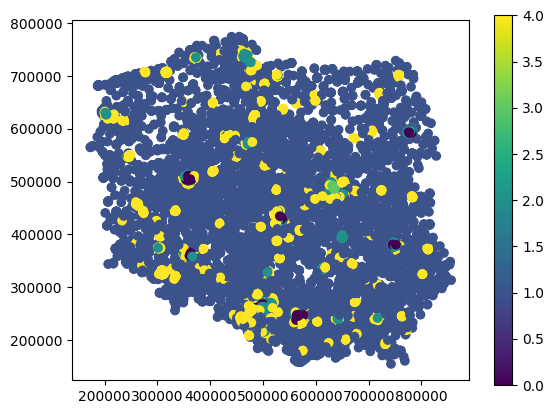

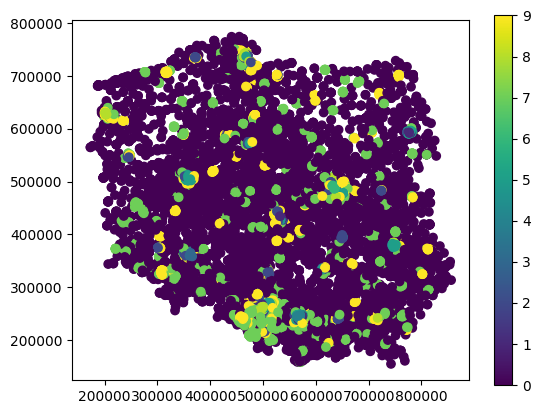

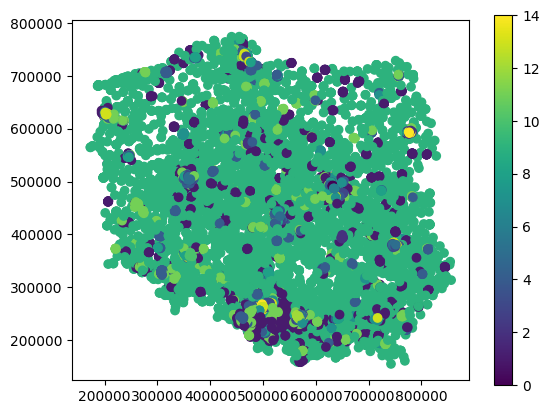

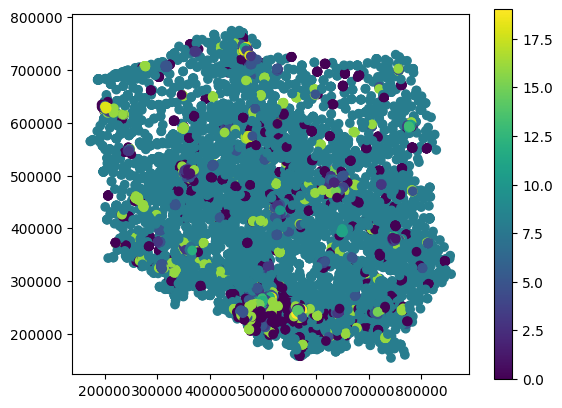

In [7]:
# Set number of cluseter to 5, 10 and 15 and fit the model

k_list = [5, 10, 15, 20]

# Add in Point Geom
gdf_pred = gdf.copy()
gdf_pred['geometry'] = gdf_pred.centroid
gdf_pred = gdf_pred.set_geometry('geometry')

for k in k_list:

    # k means using 5 clusters and k-means++ initialization
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    pred = kmeans.predict(df_scaled)

    # Combine with orignal gdf
    gdf_pred[f'{k}_clusters'] = pred

    # PLot
    gdf_pred.plot(column=f'{k}_clusters', legend=True)

# # Convert to WGS and save
gdf_pred = gdf_pred.to_crs('4236')
gdf_pred['lon'] = gdf_pred.geometry.x
gdf_pred['lat'] = gdf_pred.geometry.y
gdf_pred.to_file('C:/Users/alkaye/geodemographics-demonstrator/processed_data/pharmacies_clustered.geojson')
gdf_pred.to_csv('C:/Users/alkaye/geodemographics-demonstrator/processed_data/pharmacies_clustered.csv')

    

In [8]:
# predictions = pd.DataFrame(df_scaled)
# predictions['cluster'] = pred
# predictions['cluster'].value_counts()